<a href="https://colab.research.google.com/github/MuhammadFaisalAvicenna/datamining/blob/master/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas 1 (Dissimilarity Binary Assymetric)
---

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dataset_url = "https://raw.githubusercontent.com/MuhammadFaisalAvicenna/datamining/master/train_and_test2.csv"
df = pd.read_csv(dataset_url, index_col='Passengerid')

In [ ]:
df

,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
Passengerid,,,,,,,,,,,,,,,,,,,,,
1,22.0,7.2500,0,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
2,38.0,71.2833,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
3,26.0,7.9250,1,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
4,35.0,53.1000,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
5,35.0,8.0500,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,28.0,8.0500,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1306,39.0,108.9000,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1307,38.5,7.2500,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [ ]:
number_of_columns = df.shape[1]

In [ ]:
pd.set_option('display.max_columns', number_of_columns)
pd.set_option('display.max_rows', number_of_columns)

In [ ]:
df.columns

Index(['Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1', 'zero.2', 'zero.3',
       'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7', 'zero.8', 'zero.9',
       'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'Pclass',
       'zero.15', 'zero.16', 'Embarked', 'zero.17', 'zero.18', '2urvived'],
      dtype='object')

#Nominal Features


*   Survived
*   Embarked



In [ ]:
df[["Age","2urvived", "Embarked"]].head(5)

,Age,2urvived,Embarked
Passengerid,,,
1,22.0,0,2.0
2,38.0,1,0.0
3,26.0,1,2.0
4,35.0,1,2.0
5,35.0,0,2.0


# Change Values 1/10


* Take all values of ‘Embarked’ series

* If values is 2.0 change to S

* If values is 0.0 change to C



In [ ]:
code_embark_for_cherbourg = "0"
code_embark_for_southampton = "2"

value_of_one = 1
value_of_zero = 0

def change_code_embark_to_biner(embarked):
    return value_of_one if embarked == code_embark_for_southampton else value_of_zero

In [ ]:
df["Embarked"] = df["Embarked"].apply(change_code_embark_to_biner)

In [ ]:
df[["Age","2urvived", "Embarked"]].head(5)

,Age,2urvived,Embarked
Passengerid,,,
1,22.0,0,0
2,38.0,1,0
3,26.0,1,0
4,35.0,1,0
5,35.0,0,0


In [ ]:
DECREMENT_BY_ONE = 1
INCREMENT_BY_ONE = 1

CONTINGENCY_TABLE_VALUE = {
    "q" : (1,1),
    "r" : (1,0),
    "s" : (0,1),
    "t" : (0,0),
}

In [ ]:
def get_series(df, idx, series):
    return df.loc[(idx), series]

In [ ]:
def get_dissimilarity_dataset(df, series_index = [], series = []):
    first_series = get_series(df, series_index[0], series)
    second_series = get_series(df, series_index[1], series)
    dataset = pd.concat([first_series,second_series],axis=1)
    return dataset.T

In [ ]:
get_dissimilarity_dataset(df, [1,2], ["2urvived", "Embarked"]).T

,1,2
2urvived,0.0,1.0
Embarked,0.0,0.0


In [ ]:
df.loc[0:5, ["2urvived", "Embarked"]]

,2urvived,Embarked
Passengerid,,
1,0,0
2,1,0
3,1,0
4,1,0
5,0,0


In [ ]:
def count_contingency_value(df, start_index = 0, last_index = 1):

    CONTINGENCY_VALUE = {
        "q" : 0,
        "r" : 0,
        "s" : 0,
        "t" : 0,
    }

    column_range = df.shape[1]

    for column in range(column_range):
        for value in CONTINGENCY_TABLE_VALUE:
            item = list((tuple(df.loc[(start_index):(last_index), df.columns[column]]) == CONTINGENCY_TABLE_VALUE[value], value))
            if item[0] == True:
                if item[1] == "q":
                    CONTINGENCY_VALUE["q"] += 1
                if item[1] == "r":
                    CONTINGENCY_VALUE["r"] += 1
                if item[1] == "s":
                    CONTINGENCY_VALUE["s"] += 1
                if item[1] == "t":
                    CONTINGENCY_VALUE["t"] += 1

    return CONTINGENCY_VALUE

In [ ]:
df_1_2 = get_dissimilarity_dataset(df, [1,2], ["2urvived", "Embarked"])

In [ ]:
c_d_1_2 = count_contingency_value(df_1_2, 1, 2)

In [ ]:
df_1_3 = get_dissimilarity_dataset(df, [1,3], ["2urvived", "Embarked"])

In [ ]:
c_d_1_3 = count_contingency_value(df_1_3, 1, 3)

In [ ]:
df_1_4 = get_dissimilarity_dataset(df, [1,4], ["2urvived", "Embarked"])

In [ ]:
c_d_1_4 = count_contingency_value(df_1_4, 1, 4)

In [ ]:
df_1_5 = get_dissimilarity_dataset(df, [1,5], ["2urvived", "Embarked"])

In [ ]:
c_d_1_5 = count_contingency_value(df_1_5, 1, 5)

# Dissimilarity Binary Assymetric Value Formula


In [ ]:
def measure_dissimilarity_binary_value_assymetric_distance(contingency_value):

    return (contingency_value["r"] + contingency_value["s"]) / (contingency_value["q"] + contingency_value["r"] + contingency_value["s"])

In [ ]:
d_1_2 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)
d_1_3 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_3)
d_1_4 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_4)

In [ ]:
d_1_2

1.0

In [ ]:
d_1_3

1.0

In [ ]:
d_1_4

1.0

# Tugas 2 (Diskritisasi)
# Diskritisasi
# Load data Iris dataset
# Lakukan diskritisasi pada dataset
---

In [ ]:
import numpy as pd
import pandas as pd

In [ ]:
dataset_url='https://github.com/MuhammadFaisalAvicenna/datamining/blob/master/Iris.csv'
data=pd

In [ ]:
from sklearn import datasets
iris= datasets.load_iris()
x= iris.data[:, :1]
y= iris.target

In [ ]:
x

array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5. ],
       [5.4],
       [4.6],
       [5. ],
       [4.4],
       [4.9],
       [5.4],
       [4.8],
       [4.8],
       [4.3],
       [5.8],
       [5.7],
       [5.4],
       [5.1],
       [5.7],
       [5.1],
       [5.4],
       [5.1],
       [4.6],
       [5.1],
       [4.8],
       [5. ],
       [5. ],
       [5.2],
       [5.2],
       [4.7],
       [4.8],
       [5.4],
       [5.2],
       [5.5],
       [4.9],
       [5. ],
       [5.5],
       [4.9],
       [4.4],
       [5.1],
       [5. ],
       [4.5],
       [4.4],
       [5. ],
       [5.1],
       [4.8],
       [5.1],
       [4.6],
       [5.3],
       [5. ],
       [7. ],
       [6.4],
       [6.9],
       [5.5],
       [6.5],
       [5.7],
       [6.3],
       [4.9],
       [6.6],
       [5.2],
       [5. ],
       [5.9],
       [6. ],
       [6.1],
       [5.6],
       [6.7],
       [5.6],
       [5.8],
       [6.2],
       [5.6],
       [5.9],
      

In [ ]:
df= pd.DataFrame(x,columns=['sepal'])

In [ ]:
df

,sepal
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
...,...
145,6.7
146,6.3
147,6.5
148,6.2


# Tugas 3 (K-NN Algorithm)

---

## Baca Data 


*   Baca data dengan *library pandas* *italicized text*
*   Data [Bunga Iris](https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv)


#### Persiapan :


*   Import *train_test_split* dari *sklearn*
*   Import *KNeighborsClassifier* dari *sklearn*
*   Import *pandas library*



In [ ]:
from sklearn.model_selection import train_test_split#split dataset into train and test data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier# Create KNN classifier

In [ ]:
import pandas as pd

In [ ]:
dataset_url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"

In [ ]:
df = pd.read_csv(dataset_url)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
#check number of rows and columns in dataset
df.shape

(150, 5)

### Hitung Data

*   Pisahkan kolom "variety" dari *dataframe*
*   Ambil kolom "variety" sebagai target kolom untuk kategori kelas
*   Pisahkan data latih dengan data tes


```
> data latih (nilai data)
X_train 

> data tes (nilai data)
X_test 

> data latih (kelas data)
y_train

> data tes (kelas data)
y_test
```





In [ ]:
#create a dataframe with all training data except the target column
X = df.drop(columns=["variety"])#check that the target variable has been removed
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# separate target values
y = df["variety"].values  # view target values
y[0:5]

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa'], dtype=object)

In [ ]:
# percent_amount_of_test_data = / HUNDRED_PERCENT
percent_amount_of_test_data = 0.2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = percent_amount_of_test_data, random_state=1, stratify=y)



*   Tentukan nilai K = 10 (10 tetangga terdekat)
*   Buat data latih


```
knn_classifier.fit(train_data)
```

In [ ]:
amount_of_neighbor = 3

In [ ]:
# Fit the classifier to the data
knn = KNeighborsClassifier(n_neighbors = amount_of_neighbor)

# create train data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)



*   Tes data target terhadap data latih
*   Tampilkan predksi 10 data pertama



```
knn_classifier.predict(test_data)
```





In [ ]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:30]

array(['Virginica', 'Setosa', 'Versicolor', 'Setosa', 'Setosa', 'Setosa',
       'Virginica', 'Virginica', 'Virginica', 'Versicolor', 'Setosa',
       'Versicolor', 'Virginica', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Versicolor',
       'Versicolor', 'Setosa', 'Setosa', 'Virginica', 'Versicolor',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor'], dtype=object)



*   Cetak prediksi nilai dari data tes



```
knn_classifier.score(test_data)
```





In [ ]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.9666666666666667

### Kesimpulan


*   Dataset bunga *iris* terdiri dari 150 data
*   Ambil 80% dari *iris dataset* sebagai data latih
*   Ambil 20% dari *iris dataset* sebagai data tes
*   Tetapkan nilai K = 10
*   Hasil 10 data pertama dari 20% data latih


```
['Virginica', 'Setosa', 'Versicolor', 'Setosa', 'Setosa', 'Setosa',
       'Virginica', 'Virginica', 'Virginica', 'Versicolor']
```
*   Dengan akurasi data yaitu $ 0.967\% $





#Tugas 4 (Naїve Bayes )

---
**Naїve Bayes Classifier**

In [ ]:
import pandas as pd

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [ ]:
dataset_url = "https://raw.githubusercontent.com/MuhammadFaisalAvicenna/datamining/master/Iris.csv"
iris = pd.read_csv(dataset_url)
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris.drop(columns="Id",inplace=True)

In [ ]:
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


# Tugas 5 (Clustering)

---

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.8/site-packages')

from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

import csv
with open('iris.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, quoting=csv.QUOTE_NONNUMERIC)
    writer.writerow(iris.feature_names)
    writer.writerows(iris.data.tolist())

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
# see https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html for the full API
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(iris.data)

print(kmeans.labels_)
print(kmeans.cluster_centers_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


#Implement K-means clustering in Python

In [ ]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Cluster Assignment Algorithm**

In [ ]:
# Assign every training example x^(i) to its closest centroid, given the current centroid positions
def find_closest_centroids(X, centroids):
    '''returns the array of assigned clusters to each example ''' 
    m = X.shape[0] # no of datappints
    k = centroids.shape[0]  #division size
    idx = np.zeros(m) # array to assign the centriod
    
    # Your Code Here
    for i in range (X.shape[0]):
        distances = np.linalg.norm(X[i]-centroids, axis=1)
        min_dist = np.argmin(distances)
        idx[i] = min_dist
    
    
    return idx

**Computing Centoroid Means**

In [ ]:
# Update Centroids
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))  #3*4
    '''Return Updated Values of all K centroids'''
    
    # Your Code Here
    for i in range(k):
        centroids[i,:] = np.mean(X[idx.ravel() == i,:], axis = 0)
    
    return centroids        
    

**Putting it all together (full algorithm: cluster assignment and re-computing centroids)**

In [ ]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        # find closest centroid
        idx = find_closest_centroids(X, centroids)
        #update centroids
        centroids = compute_centroids(X, idx, k)
    
    return idx, centroids
 

**Now we will shuffle our data so that the data point are not in order, and save the clusters for visualization**

In [ ]:
X=iris.data
np.random.shuffle(X)
cluster1 = X[0:50,:]
cluster2 = X[50:100,:]
cluster3 = X[100:150,:]

**Now let’s run algorithim and form k-means clusters from random initial clusters**

In [ ]:
initial_centroids = initial_centroids = np.array([X[random.randint(0,50)], X[random.randint(50,100)], X[random.randint(100,150)]])
# Select k=3 , pick 3 random centroids from data
idx, centroids = run_k_means(X, initial_centroids, 2000)# use 1000 iterations to perform clustering

**Save the clusters form by the k-mean for further visualization**

In [ ]:
k_Meancluster1 = X[np.where(idx == 0)[0],:]
k_Meancluster2 = X[np.where(idx == 1)[0],:]
k_Meancluster3 = X[np.where(idx == 2)[0],:]

#Add a visualisation
Identify a suitable library to depict both your inputs as well as the results of k-means clustering applied to those inputs.
#Using Matplotlib
**First Lets see the initial input with random clusters**

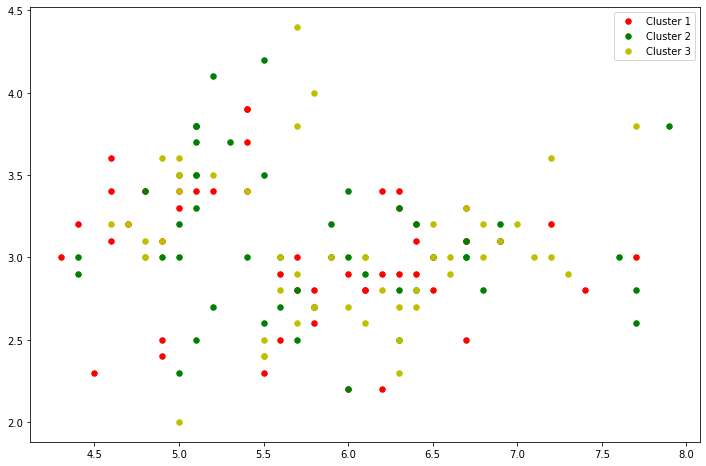

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='y', label='Cluster 3')
ax.legend()

**Now let’s visuaize the Clusters form by our k-mean**

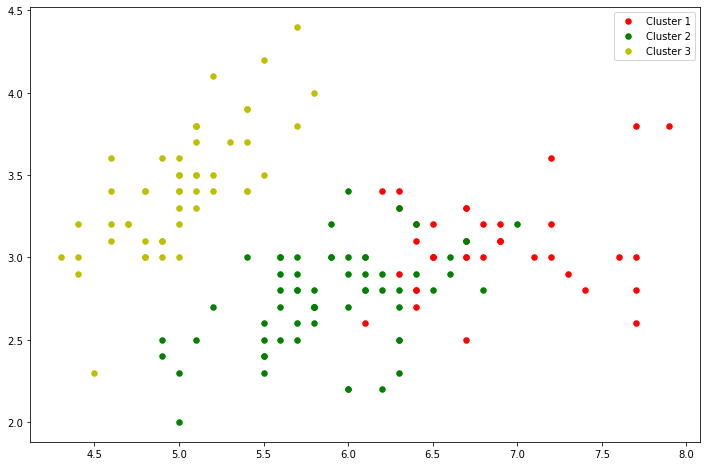

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(k_Meancluster1[:,0], k_Meancluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(k_Meancluster2[:,0], k_Meancluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(k_Meancluster3[:,0], k_Meancluster3[:,1], s=30, color='y', label='Cluster 3')
ax.legend()

#Tugas 6 (Decission Tree)

---



#Baca Data

* Baca data dengan library pandas italicized text

* Data Bunga Iris

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

In [ ]:
dataset_url = "https://raw.githubusercontent.com/MuhammadFaisalAvicenna/datamining/master/Iris.csv"

In [ ]:
df = pd.read_csv(dataset_url)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
# Missing Value in Variabel

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
# Declare feature vector and target variable
X = df.drop(['Species'], axis=1)

y = df['Species']

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((100, 5), (50, 5))

In [ ]:
# check data types in X_train

X_train.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

In [ ]:
!pip install category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=["SepalLengthCm",	"SepalWidthCm",	"PetalLengthCm",	"PetalWidthCm"])


X_train = encoder.fit_transform (X_train)

X_test = encoder.transform (X_test)

In [ ]:
X_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
96,97,1,1,1,1
105,106,2,2,2,2
66,67,3,2,3,3
0,1,4,3,4,4
122,123,5,4,5,5


In [ ]:
X_test.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,74,21.0,4.0,31.0,11
18,19,1.0,7.0,12.0,7
118,119,5.0,18.0,-1.0,14
78,79,14.0,1.0,3.0,3
76,77,25.0,4.0,16.0,21


In [ ]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 1.0000


In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'I

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 1.0000


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


[Text(0.6, 0.8333333333333334, 'X[0] <= 100.5\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.4, 0.5, 'X[0] <= 50.5\ngini = 0.498\nsamples = 66\nvalue = [31, 35, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

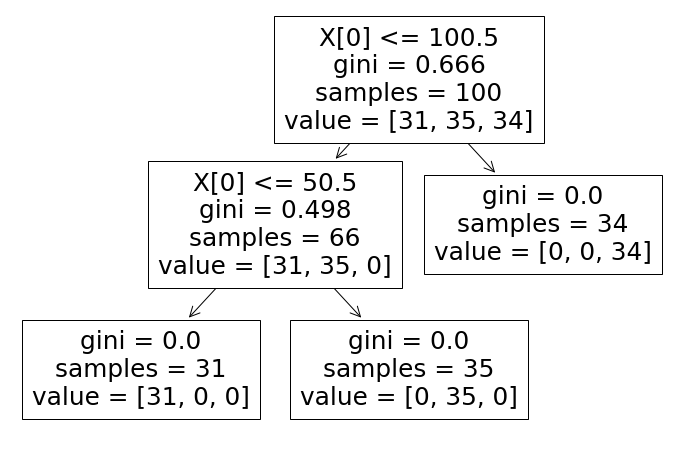

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

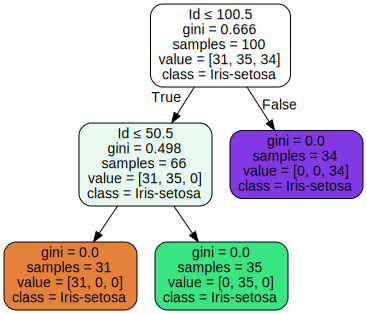

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 